<a href="https://colab.research.google.com/github/saraMuay/Churned_Customer_Project/blob/main/Churned_Customer_Project_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Churned Customers Prediction Model



### 1. Import necessary libraries:

In [ ]:
# Install if necessary.
#!pip install keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
import keras
import keras.utils
from keras.models import Model                       # We will use Functional API.
from keras.layers import Dense, Input #, Dropout, Activation
from keras.optimizers import Adam
import warnings   

               
warnings.filterwarnings('ignore')                    # Turn the warnings off.
%matplotlib inline

In [3]:
# use GPU after activate from the notebook settings
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
#Import the dataset to colab files from githup
!git clone https://github.com/saraMuay/Churned_Customer_Project.git

Cloning into 'Churned_Customer_Project'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


#### 1.1. Read in the data:

More information about the dataset can be found [here](https://community.ibm.com/accelerators/?context=analytics&query=telco%20churn&type=Data&product=Cognos%20Analytics).

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/saraMuay/Churned_Customer_Project/main/Telco_customer_churn.csv')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [7]:
data.shape

(7043, 33)

#### 1.2. Perform EDA:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [9]:
data['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

###### In previos result, we observed Unbalanced classes which lead us to perform undersampling for 0 values

#### 2. Data Preprocessing:

##### 2.1 Undersampling:

In [10]:
# correct columns names to avoid any error related to it.
data.columns = [c.replace(' ', '_') for c in data.columns]

The result above shows that after undersampling, the two classes of gender (male, female) are now balanced. 

In [ ]:
#Re-union the two Churn labes (0,1) after Undersampling
#data = pd.concat([df0, df1])

In [ ]:
#data['Churn_Value'].value_counts()

##### 2.2 Drop Unnecessary Columns:

In [ ]:
#Removing unnecessary columns
#data = data.drop('CustomerID', inplace=True, axis=1)
#data = data.drop('Count', inplace=True, axis=1)
#data = data.drop('Country', inplace=True, axis=1)
#data = data.drop('State', inplace=True, axis=1)
#data = data.drop('Zip_Code', inplace=True, axis=1)
#data = data.drop('Lat_Long', inplace=True, axis=1)
#data = data.drop('Latitude', inplace=True, axis=1)
#data = data.drop('Longitude', inplace=True, axis=1)
#data = data.drop('Paperless_Billing', inplace=True, axis=1)
#data = data.drop('Total_Charges', inplace=True, axis=1)
#data = data.drop('Churn_Label', inplace=True, axis=1)
#data = data.drop('Churn_Score', inplace=True, axis=1)
#data = data.drop('CLTV', inplace=True, axis=1)

In [ ]:

#Removing unnecessary columns
data = data.drop(columns = ['CustomerID', 'Count','Country','State', 'City','Zip_Code','Lat_Long','Latitude','Longitude'
                            ,'Paperless_Billing','Total_Charges','Churn_Label','Churn_Score','CLTV', 'Churn_Reason'])
data

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Churn_Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,99.65,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Electronic check,104.80,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Bank transfer (automatic),21.15,0
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check,84.80,0
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,0
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check,29.60,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure_Months      7043 non-null   int64  
 5   Phone_Service      7043 non-null   object 
 6   Multiple_Lines     7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Payment_Method     7043 non-null   object 
 16  Monthly_Charges    7043 

In [ ]:
# % of the churn 
data.groupby('Churn_Value').size() / len(data)

Churn_Value
0    0.73463
1    0.26537
dtype: float64

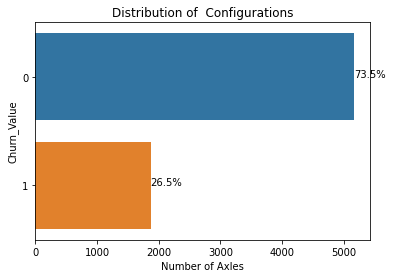

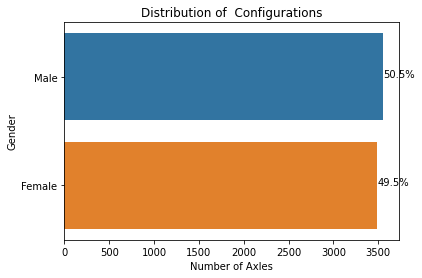

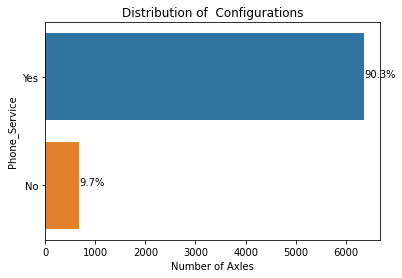

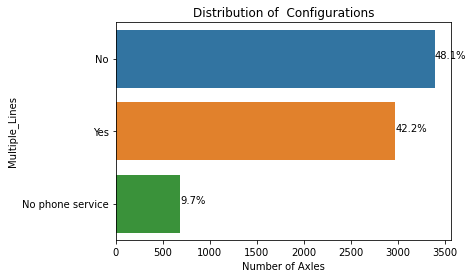

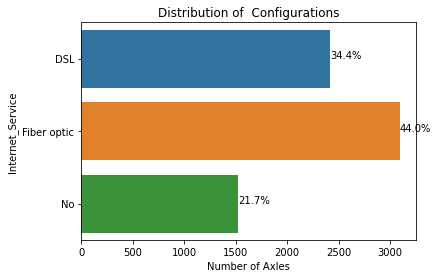

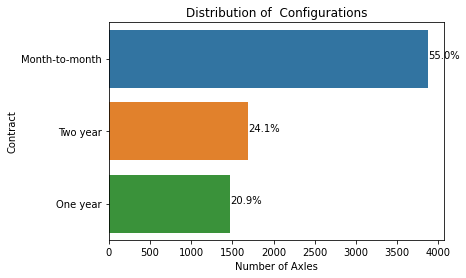

In [ ]:
# befor any change on the original data 
import seaborn as sns
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution of  Configurations')
    plt.xlabel('Number of Axles')
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(data, "Churn_Value")
bar_plot(data, "Gender")
bar_plot(data, "Phone_Service")
bar_plot(data, "Multiple_Lines")
bar_plot(data, "Internet_Service")
bar_plot(data, "Contract")

New clients are more likely to churn

Clients with higher MonthlyCharges are also more likely to churn

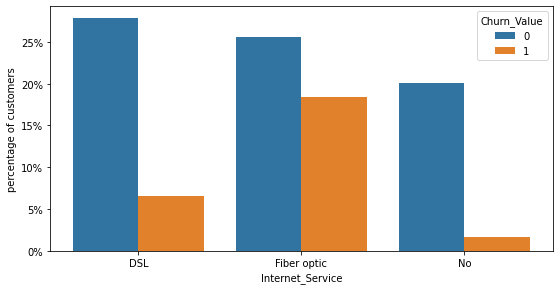

 Customer with Fiber optic Internet more likly to Churn


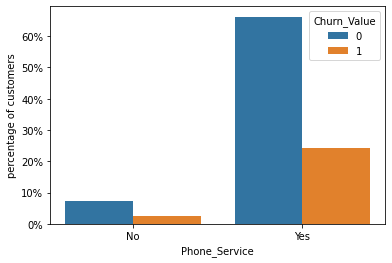

In [ ]:
def barplot_percentages(f, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = data.groupby(f)["Churn_Value"].value_counts().to_frame()
    g = g.rename({"Churn_Value": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data)
    if orient == 'v':
        ax = sns.barplot(x=f, y= axis_name, hue='Churn_Value', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=f, hue='Churn_Value', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

plt.figure(figsize=(9, 4.5))

barplot_percentages('Internet_Service')
plt.show()
print(' Customer with Fiber optic Internet more likly to Churn')
barplot_percentages('Phone_Service')
plt.show()

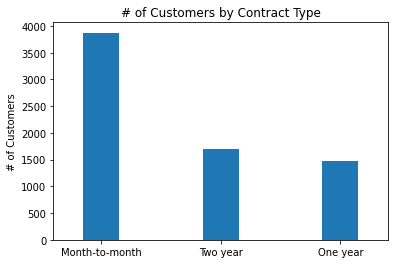

In [ ]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')
plt.show()

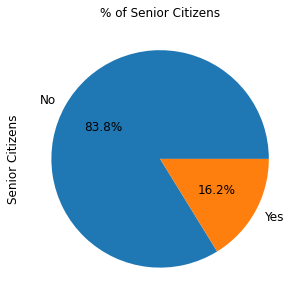

In [ ]:
import matplotlib.ticker as mtick
ax = (data['Senior_Citizen'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)
plt.show()

##### 2.3 Create Dummies Varibles for Necessary Columns:

In [ ]:
# create dymmy variables
#data = pd.get_dummies(data['Gender'])
#data = pd.get_dummies(data['Senior_Citizen'])
#data = pd.get_dummies(data['Partner'])
#data = pd.get_dummies(data['Dependents'])
#data = pd.get_dummies(data['Phone_Service'])
#data = pd.get_dummies(data['Multiple_Lines'])
#data = pd.get_dummies(data['Internet_Service'])
#data = pd.get_dummies(data['Online_Security'])
#data = pd.get_dummies(data['Device_Protection'])
#data = pd.get_dummies(data['Tech_Support'])
#data = pd.get_dummies(data['Streaming_TV'])
#data = pd.get_dummies(data['Streaming_Movies'])
#data = pd.get_dummies(data['Contract'])
#data = pd.get_dummies(data['Payment_Method'])

In [ ]:
# Create Dummies Variable
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data.head()

,Tenure_Months,Monthly_Charges,Churn_Value,Gender_Male,Senior_Citizen_Yes,Partner_Yes,Dependents_Yes,Phone_Service_Yes,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes,Online_Backup_No internet service,Online_Backup_Yes,Device_Protection_No internet service,Device_Protection_Yes,Tech_Support_No internet service,Tech_Support_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,2,53.85,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,70.70,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8,99.65,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,28,104.80,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
4,49,103.70,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
data.corr()

,Tenure_Months,Monthly_Charges,Churn_Value,Gender_Male,Senior_Citizen_Yes,Partner_Yes,Dependents_Yes,Phone_Service_Yes,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes,Online_Backup_No internet service,Online_Backup_Yes,Device_Protection_No internet service,Device_Protection_Yes,Tech_Support_No internet service,Tech_Support_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
Tenure_Months,1.000000,0.247900,-0.352229,0.005106,0.016567,0.379697,0.131376,0.008448,-0.008448,0.331941,0.019720,-0.039062,-0.039062,0.327203,-0.039062,0.360277,-0.039062,0.360653,-0.039062,0.324221,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.233006,-0.208363,-0.233852
Monthly_Charges,0.247900,1.000000,0.193356,-0.014569,0.220173,0.096848,-0.144206,0.247398,-0.247398,0.490434,0.787066,-0.763557,-0.763557,0.296594,-0.763557,0.441780,-0.763557,0.482692,-0.763557,0.338304,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.030550,0.271625,-0.377437
Churn_Value,-0.352229,0.193356,1.000000,-0.008612,0.150889,-0.150448,-0.248542,0.011942,-0.011942,0.040102,0.308020,-0.227890,-0.227890,-0.171226,-0.227890,-0.082255,-0.227890,-0.066160,-0.227890,-0.164674,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,-0.134302,0.301919,-0.091683
Gender_Male,0.005106,-0.014569,-0.008612,1.000000,-0.001874,-0.001808,0.005229,-0.006488,0.006488,-0.008414,-0.011286,0.006026,0.006026,-0.017021,0.006026,-0.013773,0.006026,-0.002105,0.006026,-0.009212,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,0.001215,0.000752,0.013744
Senior_Citizen_Yes,0.016567,0.220173,0.150889,-0.001874,1.000000,0.016479,-0.174396,0.008576,-0.008576,0.142948,0.255338,-0.182742,-0.182742,-0.038653,-0.182742,0.066572,-0.182742,0.059428,-0.182742,-0.060625,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
Partner_Yes,0.379697,0.096848,-0.150448,-0.001808,0.016479,1.000000,0.363430,0.017706,-0.017706,0.142057,0.000304,0.000615,0.000615,0.143106,0.000615,0.141498,0.000615,0.153786,0.000615,0.119999,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,0.082029,-0.083852,-0.095125
Dependents_Yes,0.131376,-0.144206,-0.248542,0.005229,-0.174396,0.363430,1.000000,0.000625,-0.000625,-0.027510,-0.162353,0.172110,0.172110,0.050353,0.172110,0.003457,0.172110,-0.022343,0.172110,0.028811,0.172110,-0.057717,0.172110,-0.073364,0.014680,0.190262,0.041254,-0.141476,0.071056
Phone_Service_Yes,0.008448,0.247398,0.011942,-0.006488,0.008576,0.017706,0.000625,1.000000,-1.000000,0.279690,0.289999,0.172209,0.172209,-0.092893,0.172209,-0.052312,0.172209,-0.071227,0.172209,-0.096340,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,-0.007721,0.003062,-0.003319
Multiple_Lines_No phone service,-0.008448,-0.247398,-0.011942,0.006488,-0.008576,-0.017706,-0.000625,-1.000000,1.000000,-0.279690,-0.289999,-0.172209,-0.172209,0.092893,-0.172209,0.052312,-0.172209,0.071227,-0.172209,0.096340,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,0.007721,-0.003062,0.003319
Multiple_Lines_Yes,0.331941,0.490434,0.040102,-0.008414,0.142948,0.142057,-0.027510,0.279690,-0.279690,1.000000,0.366083,-0.210564,-0.210564,0.098108,-0.210564,0.202237,-0.210564,0.201137,-0.210564,0.100571,-0.210564,0.257152,-0.210564,0.258751,-0.003794,0.106253,0.060048,0.083618,-0.227206


In [ ]:
# Visualize the corrolation 

# after dummies and graph 

#corr_heatmap = data.copy()
#corr_heatmap.corr().style.background_gradient(cmap='cividis)

data_heatmap = data.copy()
data_heatmap.corr().style.background_gradient(cmap='cividis')

,Tenure_Months,Monthly_Charges,Churn_Value,Gender_Male,Senior_Citizen_Yes,Partner_Yes,Dependents_Yes,Phone_Service_Yes,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes,Online_Backup_No internet service,Online_Backup_Yes,Device_Protection_No internet service,Device_Protection_Yes,Tech_Support_No internet service,Tech_Support_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
Tenure_Months,1.000000,0.247900,-0.352229,0.005106,0.016567,0.379697,0.131376,0.008448,-0.008448,0.331941,0.019720,-0.039062,-0.039062,0.327203,-0.039062,0.360277,-0.039062,0.360653,-0.039062,0.324221,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.233006,-0.208363,-0.233852
Monthly_Charges,0.247900,1.000000,0.193356,-0.014569,0.220173,0.096848,-0.144206,0.247398,-0.247398,0.490434,0.787066,-0.763557,-0.763557,0.296594,-0.763557,0.441780,-0.763557,0.482692,-0.763557,0.338304,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.030550,0.271625,-0.377437
Churn_Value,-0.352229,0.193356,1.000000,-0.008612,0.150889,-0.150448,-0.248542,0.011942,-0.011942,0.040102,0.308020,-0.227890,-0.227890,-0.171226,-0.227890,-0.082255,-0.227890,-0.066160,-0.227890,-0.164674,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,-0.134302,0.301919,-0.091683
Gender_Male,0.005106,-0.014569,-0.008612,1.000000,-0.001874,-0.001808,0.005229,-0.006488,0.006488,-0.008414,-0.011286,0.006026,0.006026,-0.017021,0.006026,-0.013773,0.006026,-0.002105,0.006026,-0.009212,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,0.001215,0.000752,0.013744
Senior_Citizen_Yes,0.016567,0.220173,0.150889,-0.001874,1.000000,0.016479,-0.174396,0.008576,-0.008576,0.142948,0.255338,-0.182742,-0.182742,-0.038653,-0.182742,0.066572,-0.182742,0.059428,-0.182742,-0.060625,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
Partner_Yes,0.379697,0.096848,-0.150448,-0.001808,0.016479,1.000000,0.363430,0.017706,-0.017706,0.142057,0.000304,0.000615,0.000615,0.143106,0.000615,0.141498,0.000615,0.153786,0.000615,0.119999,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,0.082029,-0.083852,-0.095125
Dependents_Yes,0.131376,-0.144206,-0.248542,0.005229,-0.174396,0.363430,1.000000,0.000625,-0.000625,-0.027510,-0.162353,0.172110,0.172110,0.050353,0.172110,0.003457,0.172110,-0.022343,0.172110,0.028811,0.172110,-0.057717,0.172110,-0.073364,0.014680,0.190262,0.041254,-0.141476,0.071056
Phone_Service_Yes,0.008448,0.247398,0.011942,-0.006488,0.008576,0.017706,0.000625,1.000000,-1.000000,0.279690,0.289999,0.172209,0.172209,-0.092893,0.172209,-0.052312,0.172209,-0.071227,0.172209,-0.096340,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,-0.007721,0.003062,-0.003319
Multiple_Lines_No phone service,-0.008448,-0.247398,-0.011942,0.006488,-0.008576,-0.017706,-0.000625,-1.000000,1.000000,-0.279690,-0.289999,-0.172209,-0.172209,0.092893,-0.172209,0.052312,-0.172209,0.071227,-0.172209,0.096340,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,0.007721,-0.003062,0.003319
Multiple_Lines_Yes,0.331941,0.490434,0.040102,-0.008414,0.142948,0.142057,-0.027510,0.279690,-0.279690,1.000000,0.366083,-0.210564,-0.210564,0.098108,-0.210564,0.202237,-0.210564,0.201137,-0.210564,0.100571,-0.210564,0.257152,-0.210564,0.258751,-0.003794,0.106253,0.060048,0.083618,-0.227206


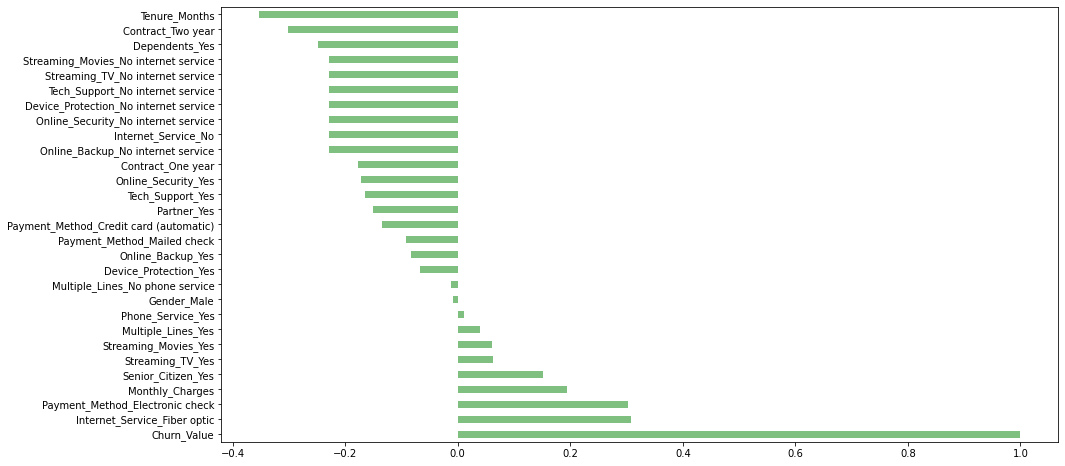

In [ ]:
# Visualize the corrolation base on churn 
plt.figure(figsize=(15,8))
data.corr()['Churn_Value'].sort_values(ascending = False).plot(kind='barh', color ='g', alpha= 0.5)
plt.show()

In [ ]:
#Removing the high correlation features
data = data.drop(columns = ['Multiple_Lines_No phone service', 'Internet_Service_No','Online_Security_No internet service',
                              'Online_Backup_No internet service','Device_Protection_No internet service',
                              'Tech_Support_No internet service','Streaming_TV_No internet service',
                            'Streaming_Movies_No internet service'
                            ])

In [ ]:
data.head()

,Tenure_Months,Monthly_Charges,Churn_Value,Gender_Male,Senior_Citizen_Yes,Partner_Yes,Dependents_Yes,Phone_Service_Yes,Multiple_Lines_Yes,Internet_Service_Fiber optic,Online_Security_Yes,Online_Backup_Yes,Device_Protection_Yes,Tech_Support_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,2,53.85,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
1,2,70.70,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,8,99.65,1,0,0,0,1,1,1,1,0,0,1,0,1,1,0,0,0,1,0
3,28,104.80,1,0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0
4,49,103.70,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0


##### 2.4 Scaling the Features :

In [ ]:
# Creating X features, Y responce varible
X = data.drop(columns=['Churn_Value'])
Y = data.Churn_Value
Y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn_Value, Length: 7043, dtype: int64

In [ ]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

X


array([[0.02777778, 0.35422886, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.02777778, 0.52189055, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.11111111, 0.80995025, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.84527363, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15277778, 0.11293532, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.91666667, 0.86965174, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#mnal-X.loc[[0]]
X[0]

array([0.02777778, 0.35422886, 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ])

#### 3. Visualize the data:

New clients are more likely to churn

Clients with higher MonthlyCharges are also more likely to churn




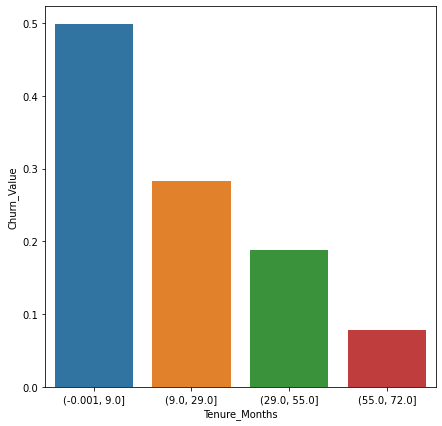

None


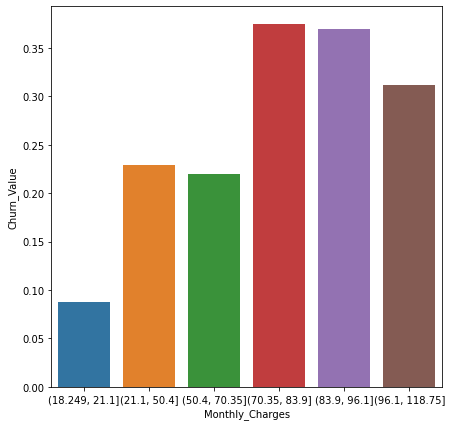

In [ ]:
plt.figure(figsize=(7,7))
w = pd.qcut(data.Tenure_Months,4)
sns.barplot(x=w ,y='Churn_Value', ci=None, data=data)
print(plt.show()) 

plt.figure(figsize=(7,7))
w = pd.qcut(data.Monthly_Charges,6)                   
sns.barplot(x= w,y='Churn_Value', ci=None, data=data)
plt.show()

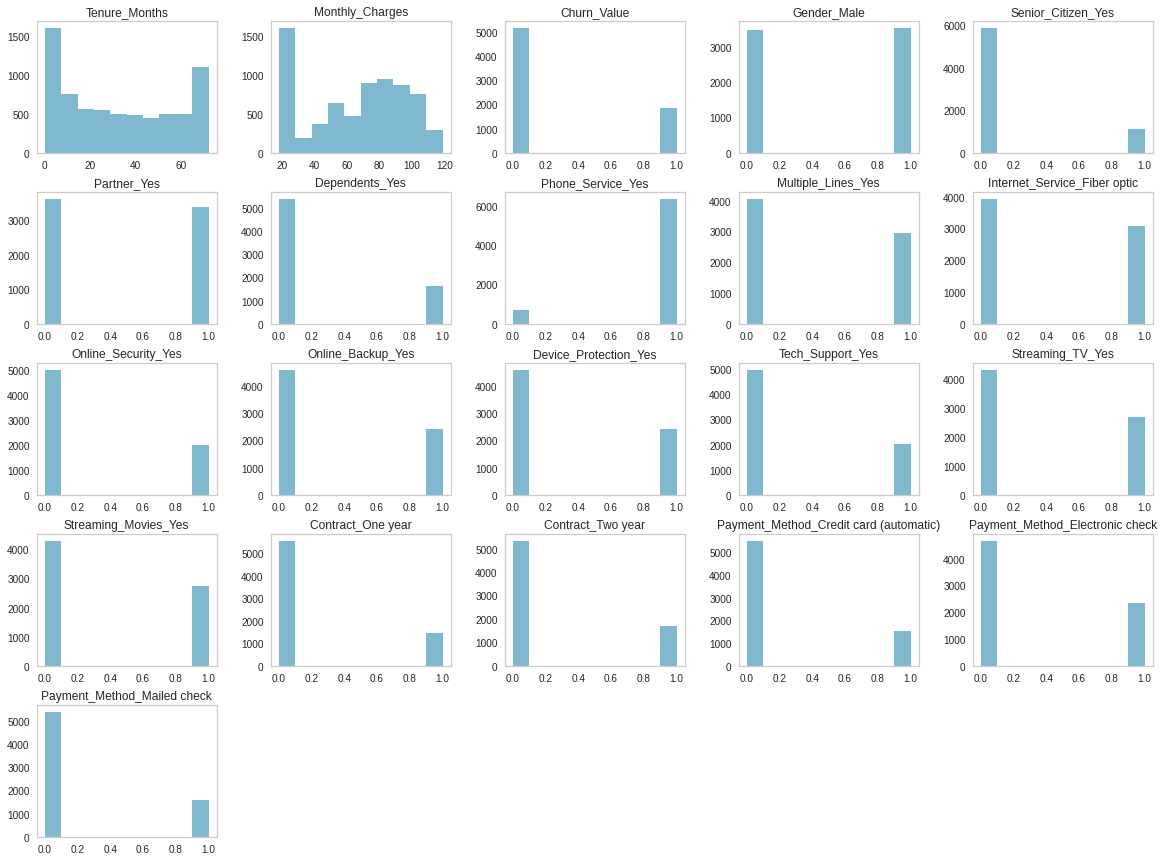

In [ ]:
data.hist(figsize=(20,15), color = 'b', alpha= 0.5 ,grid= False)
plt.show()

#### 1.9 Undersampling using SMOT Adasyn:

In [ ]:
from imblearn.over_sampling import ADASYN 
from collections import Counter

counter= Counter(Y)
print('Before',counter)
# oversampling the train dataset using ADASYN

ada= ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X,Y)

counter= Counter(y_train_ada)

print('After',counter)


Before Counter({0: 5174, 1: 1869})
After Counter({0: 5174, 1: 5050})


#### 4. Train the model & Define the hyperparameters and optimizer:

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train_ada, y_train_ada, test_size=0.3, random_state=3)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7156, 20)
(3068, 20)
(7156,)
(3068,)


#### 4.1 Dession Tree:

In [ ]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(1,10) #31
max_leaf_nodes_grid = np.arange(2,10)#21
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

In [ ]:
gridCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs = -1)
gridCV.fit(x_train, y_train);
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

In [ ]:
print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))

Tree best depth : 1
Tree best min_samples_leaf : 1
Tree best max_leaf_nodes : 2


In [ ]:
DTC_best = DecisionTreeClassifier(max_depth = best_depth ,min_samples_leaf = best_min_samples_leaf ,max_leaf_nodes = best_max_leaf_nodes)
DTC_best.fit(x_train, y_train);
Y_pred = DTC_best.predict(x_test)
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

Tree best accuracy : 0.642


 4.2 Random Forest:

In [ ]:

n_estimators_grid = np.arange(20, 100,2)
depth_grid = np.arange(1, 21)
min_samples_leaf_grid = np.arange(1,21)

parameters = {'n_estimators': n_estimators_grid, 'max_depth': depth_grid, 'min_samples_leaf':min_samples_leaf_grid}

gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
gridCV.fit(x_train, y_train)



In [ ]:
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']

print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_min_samples_leaf))

In [ ]:
RF_best = RandomForestClassifier(n_estimators= best_n_estim ,max_depth = best_depth  ,min_samples_leaf= best_min_samples_leaf,random_state=123)
RF_best.fit(x_train, y_train)
Y_pred = RF_best.predict(x_test)
print ( )
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

In [ ]:
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

4.3 Gradient Boosting Classifier

In [ ]:
n_estimators_grid = np.arange(20, 100,2)
learn_rate =0.02*np.arange(1, 50)
max_depth = np.arange(1,10)

parameters = {'n_estimators': n_estimators_grid, 'learning_rate': learn_rate, 'max_depth':max_depth}

gridCV = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
gridCV.fit(x_train, y_train)



In [ ]:
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']
best_learning_rate = gridCV.best_params_['learning_rate']

print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_learning_rate))

In [ ]:

clf = GradientBoostingClassifier(n_estimators= best_n_estim , learning_rate= best_learning_rate, max_depth= best_depth, random_state=123)
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)
print( "Gradient Boosting Classifier : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))
clf.score(x_test, y_test)

4.4 AdaBoost:

In [ ]:
my_max_depth = 15 
my_learn_rate = 0.01                                           
n_estimators_grid = np.arange(50, 81, 2)
parameters = {'n_estimators': n_estimators_grid}
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=my_max_depth), learning_rate=my_learn_rate)   
gridCV = GridSearchCV(AB, param_grid=parameters, cv=10, n_jobs = -1)
gridCV.fit(x_train, y_train)
best_n_estim = gridCV.best_params_['n_estimators']

KeyboardInterrupt: ignored

In [ ]:
print("AdaBoost best n estimator : " + str(best_n_estim))

AdaBoost best n estimator : 80


In [ ]:
AB_best = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=my_max_depth),n_estimators=best_n_estim,learning_rate=my_learn_rate,random_state=123)
AB_best.fit(x_train, y_train)
Y_pred = AB_best.predict(x_test)
print( "AdaBoost best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

AdaBoost best accuracy : 0.842


 4.6 XGBoost:

In [ ]:
n_estimators_grid = np.arange(20, 500,2)
learn_Rate = 0.02*np.arange(1, 50)
max_depth = np.arange(1,21)

parameters = {'n_estimators': n_estimators_grid, 'learning_Rate': learn_Rate, 'max_depth':max_depth}

gridCV = GridSearchCV( XGBClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
gridCV.fit(x_train, y_train)

In [ ]:
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']
best_learning_rate = gridCV.best_params_['learning_rate']

print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_learning_rate))

In [ ]:
XGBC = XGBClassifier(n_estimator = best_n_estim, learning_Rate = best_learning_rate, max_depth = best_depth, subsample= 0.3,  random_state=123)
XGBC.fit(x_train, y_train)
Y_pred = XGBC.predict(x_test)
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

In [ ]:
# Classification by XGBoost.
XGBC = XGBClassifier(n_estimator = 500, learning_Rate = 0.001, max_depth = 10, subsample= 0.3,  random_state=123)
XGBC.fit(x_train, y_train)
Y_pred = XGBC.predict(x_test)
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

XGBoost accuracy : 0.861


Non tree model 

In [ ]:
#Scaling for non tree model 
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.02777778, 0.35422886, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.02777778, 0.52189055, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.11111111, 0.80995025, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.84527363, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15277778, 0.11293532, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.91666667, 0.86965174, 1.        , ..., 0.        , 0.        ,
        0.        ]])

4.7 Logistic Regression:

In [ ]:

solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]

parameters = {'solver': solvers, 'max_iter' : max_iters, 'C':c_values }

gridCV = GridSearchCV(LogisticRegression(), parameters, cv=10, n_jobs= -1)              
gridCV.fit(x_train, y_train)

best_C = gridCV.best_params_['C']
best_solver = gridCV.best_params_['solver']

print ( ' best c parameter',str(best_C) )
print ( ' best solver parameter',str(best_solver) )

NameError: ignored

In [ ]:
# Train and predict.
LL = LogisticRegression(solver='lbfgs',max_iter=100, C= 0.1)
LL.fit(x_train,y_train)
y_pred_test = LL.predict(x_test)     

In [ ]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(y_test,y_pred_test)
print(conf_mat)

[[1055  490]
 [ 310 1213]]


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred_test)
 
print (np.round(accuracy,3))

0.739


In [ ]:
#ll_best = LogisticRegression( solver = best_solver, max_iter =  best_iters, C = best_C)
#ll_best.fit(x_train, y_train);
#Y_pred = ll_best.predict(x_test)
#print( "Logistic Regression best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

In [ ]:
roc_auc_score(y_train, LL.predict_proba(x_train)[:, 1])

roc_auc_score(y_train, clf.decision_function(x_train))

 4.8 Naive Bayes:

In [ ]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
Y_pred_test = GNB.predict(x_test)

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, Y_pred_test)
print(conf_mat)

[[1032  531]
 [ 290 1237]]


In [ ]:
accuracy = metrics.accuracy_score(y_test, Y_pred_test)
print('Accuracy    = ' + str(np.round(accuracy,3)))

Accuracy    = 0.734


 4.9 Support Vector Machines (SVM):




Found GPU at: /device:GPU:0


In [ ]:
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10, n_jobs=-1)        
gridCV.fit(x_train, y_train)

best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']


KeyboardInterrupt: ignored

In [ ]:
print("SVM best C : " + str(best_C))
print("SVM best gamma : " + str(best_gamma))

In [ ]:
SVM_best = SVC(kernel='rbf', C=best_C,gamma=best_gamma)
SVM_best.fit(x_train, y_train);
Y_pred = SVM_best.predict(x_test)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

In [ ]:
SVM = SVC(kernel='rbf', C=3,gamma=0.41 , probability=True)
SVM.fit(x_train, y_train)
Y_pred = SVM.predict(x_test)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))



SVM best accuracy : 0.889


In [ ]:
# trainint the model

#from sklearn.svm import SVC
#from sklearn.metrics import roc_auc_score

SVM = SVC(kernel='rbf', C=15,gamma=1 , probability=True)
SVM.fit(x_train, y_train)
Y_pred = SVM.predict(x_test)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

In [ ]:
#probabilities of the prediction to find Aria Under the Curve
y_prob = SVM.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9406536470215583

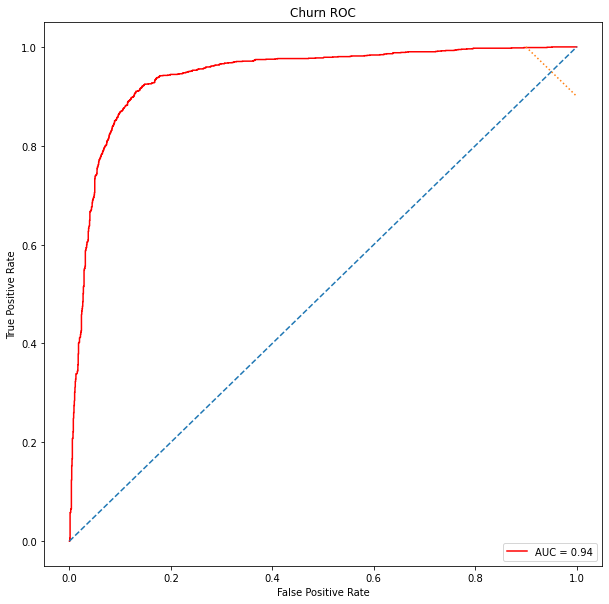

In [ ]:
# visual the AUC
plt.figure(figsize=(10,10))
plt.title('Churn ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.plot([0.9, 1], [1, 0.9],linestyle=':')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# report matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1563
           1       0.86      0.92      0.89      1527

    accuracy                           0.89      3090
   macro avg       0.89      0.89      0.89      3090
weighted avg       0.89      0.89      0.89      3090



In [ ]:
!apt-get -qq install -y yellowbrick

E: Unable to locate package yellowbrick


In [ ]:
from yellowbrick import model_selection 
viz = model_selection.FeatureImportances(SVM)
viz.fit(x_train, y_train)
viz.show()

AttributeError: ignored

In [ ]:
SVM_best = SVC(kernel='rbf', C=10,gamma=0.9)
SVM_best.fit(x_train, y_train);
Y_pred = SVM_best.predict(x_test)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

SVM best accuracy : 0.876


LGBMClassifier

In [ ]:
import lightgbm as lgb

LGB = lgb.LGBMClassifier()
LGB.fit(x_train, y_train)
print("Score : ", LGB.score(x_test, y_test))
Y_pred = LGB.predict(x_test)
print( "accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

Voting Classifier

In [ ]:
DTC = DecisionTreeClassifier(max_depth=10)
DTC.fit(x_train, y_train)
Y_pred = DTC.predict(x_test)
print( "Tree accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
Y_pred = KNN.predict(x_test)
print( "KNN accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

In [ ]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
Y_pred = LR.predict(x_test)
print( "Logistic regression accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

In [ ]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators=[('Tree',DTC),('knn',KNN),('Logistic',LR)],voting='hard')             # voting = 'hard'.
VC.fit(x_train, y_train)
Y_pred = VC.predict(x_test)
print( "Voting Classifier Accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

In [ ]:
VC = VotingClassifier(estimators=[('Tree',DTC),('knn',KNN),('Logistic',LR)],voting='soft')             # voting = 'soft'.
VC.fit(x_train, y_train)
Y_pred = VC.predict(x_test)
print( "Voting Classifier Accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))


4.10 Keras Neural Network (Logistic):

In [ ]:
n_vars = x_train.shape[1]
n_epochs = 1250
batch_size = 1000
learn_rate = 0.0005

In [ ]:
my_input = Input(shape=(n_vars,))
my_output = Dense(units=1,activation='sigmoid')(my_input)

In [ ]:
my_optimizer=Adam(lr=learn_rate)
#my_model.compile(loss = "mae", optimizer = my_optimizer, metrics=["mse"])

In [ ]:
my_model=Model(inputs=my_input,outputs=my_output)

In [ ]:
#mnal- my_model.compile(loss='binary_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
los=keras.losses.BinaryCrossentropy()
my_model.compile(loss=los , optimizer=my_optimizer, metrics=['accuracy'])

In [ ]:
my_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_summary = my_model.fit(x_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

In [ ]:
my_summary.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

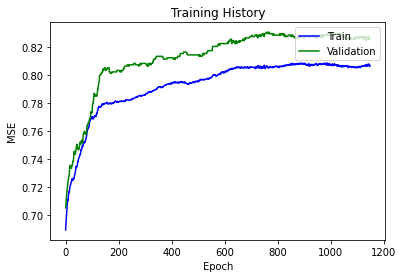

In [ ]:
n_skip = 100 
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#MSE = my_model.evaluate(x_test, y_test, verbose=0)[1]   
#RMSE = np.sqrt(MSE)
#print("Test RMSE : {}".format(np.round(RMSE,3)))

In [ ]:
ACC = my_model.evaluate(x_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.793


In [ ]:
import tensorflow as tf
m = tf.keras.metrics.Accuracy()
m.update_state(y_test, Y_pred)
m.result().numpy()

In [ ]:
#np.mean(np.equal(y_test, np.round(Y_pred)))

0.8471316818774446

### 4.9 Gradient Boosting Classifier


In [ ]:
model = GradientBoostingClassifier()
n_estimators=100
learning_rate=1.0
max_depth=1

# define grid search
grid = dict(n_estimators = n_estimators,learning_rate = learning_rate,max_depth = max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

#### 5. Testing: 

#### 6. Prediction: 






---


### Conclusion:


```
- 
-
-

```



---

